In [1]:
## import needed packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from numpy import mean
from numpy import std
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
## Load data

(trainX, trainY), (testX, testY) = mnist.load_data()

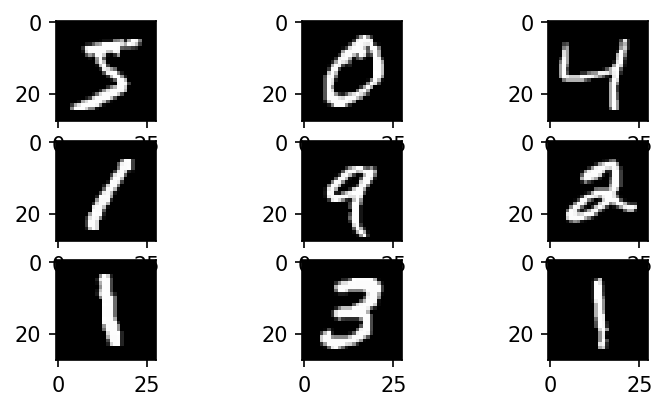

In [3]:
## to show data set

plt.figure(figsize=(6, 3), dpi=150)

for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [4]:
# reshape dataset to have a single channel


trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
## one hot encode target values


trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# convert from integers to floats


trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [7]:
# normalize to range 0-1


trainX = trainX / 255.0
testX = testX / 255.0

<h1><center>RNN for MNIST</center></h1>

In [8]:
## Build model

## import MNIST dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

batch_size = 64
input_dim = 28
units = 64
output_size = 10
# create a functions model

def ModelRNN(allow_cudnn_kernel=True):
    
    if allow_cudnn_kernel:
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
        
    else:
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    
    model_RNN = keras.models.Sequential([
        lstm_layer,
        keras.layers.BatchNormalization(),
        keras.layers.Dense(output_size),
    ])
    return model_RNN

In [9]:
## to build the model

model_RNN = ModelRNN(allow_cudnn_kernel=True)

model_RNN.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

history_RNN = model_RNN.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=10)
_, acc_rnn = model_RNN.evaluate(x_test, y_test, verbose=0)

Epoch 1/10
938/938 [==============================] - 23s 21ms/step - loss: 0.9128 - accuracy: 0.7156 - val_loss: 0.6390 - val_accuracy: 0.7904
Epoch 2/10
938/938 [==============================] - 19s 21ms/step - loss: 0.3853 - accuracy: 0.8842 - val_loss: 0.3404 - val_accuracy: 0.8925
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 0.2500 - accuracy: 0.9245 - val_loss: 0.2588 - val_accuracy: 0.9186
Epoch 4/10
938/938 [==============================] - 20s 21ms/step - loss: 0.1952 - accuracy: 0.9412 - val_loss: 0.1788 - val_accuracy: 0.9411
Epoch 5/10
938/938 [==============================] - 20s 21ms/step - loss: 0.1672 - accuracy: 0.9493 - val_loss: 0.2280 - val_accuracy: 0.9276
Epoch 6/10
938/938 [==============================] - 19s 21ms/step - loss: 0.1455 - accuracy: 0.9565 - val_loss: 0.1906 - val_accuracy: 0.9390
Epoch 7/10
938/938 [==============================] - 20s 21ms/step - loss: 0.1331 - accuracy: 0.9593 - val_loss: 0.1377 - val_accuracy:

Predicted result is: [5], target result is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


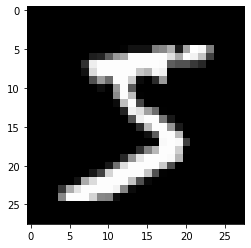

In [10]:
sample, sample_label = trainX[0], trainY[0]

with tf.device("CPU:0"):
    cpu_model = ModelRNN(allow_cudnn_kernel=True)
    cpu_model.set_weights(model_RNN.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

In [11]:
predicted_result_RNN =model_RNN.predict(x_test)
#predicted_result_RNN

In [12]:
## create confusion metrix

confusionRNN = confusion_matrix(y_test, np.argmax(predicted_result_RNN,axis=1))
confusionRNN

array([[ 964,    0,    1,    1,    1,    0,    4,    2,    7,    0],
       [   0, 1120,    1,    2,    0,    0,    4,    0,    7,    1],
       [   2,    1,  995,   17,    2,    2,    1,    1,   11,    0],
       [   0,    0,    2,  997,    0,    3,    0,    1,    7,    0],
       [   0,    0,    0,    1,  944,    0,    8,    1,    7,   21],
       [   2,    1,    1,   16,    0,  853,    4,    1,   11,    3],
       [   5,    2,    0,    0,    6,    2,  937,    0,    6,    0],
       [   1,    8,   13,   23,    3,    0,    0,  943,    3,   34],
       [   3,    0,    1,   14,    2,    3,    2,    0,  943,    6],
       [   4,    1,    0,    3,    7,    2,    1,    0,   11,  980]],
      dtype=int64)

<AxesSubplot:>

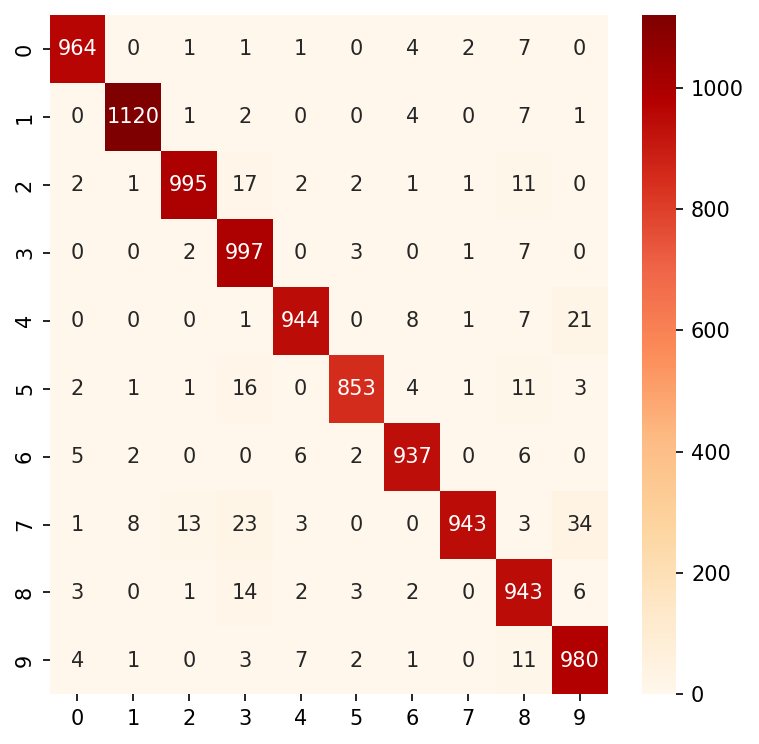

In [13]:
## graphical representation of Confusion matrix

plt.figure(figsize=(6, 6), dpi=150)
sns.heatmap(confusionRNN, annot=True, cmap="OrRd", fmt='g')

In [14]:
## precision score

precision_rnn = precision_score(y_test, np.argmax(predicted_result_RNN, axis=1), average='weighted')
print('Precision: %f' % precision_rnn)

Precision: 0.968401


In [15]:
## recall score

recall_rnn = recall_score(y_test, np.argmax(predicted_result_RNN, axis=1), average='weighted')
print('recall: %f' % recall_rnn)

recall: 0.967600


In [16]:
## f1 score

f1_rnn = f1_score(y_test, np.argmax(predicted_result_RNN, axis=1), average= 'weighted')
print('F1 score: %f' % f1_rnn)

F1 score: 0.967651


In [17]:
# kappa

kappa_rnn = cohen_kappa_score(y_test, np.argmax(predicted_result_RNN, axis=1))
print('Cohens kappa: %f' % kappa_rnn)

Cohens kappa: 0.963986


In [18]:
# # ROC AUC

# auc_rnn = roc_auc_score(y_test, np.argmax(predicted_result_RNN, axis=1), average= 'weighted')
# print('ROC AUC: %f' % auc_rnn)

<h1><center>CNN for MNIST</h1></center>

In [19]:
## define model

def ModelCNN():
    modelCNN = Sequential()
    modelCNN.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    modelCNN.add(MaxPooling2D((2, 2)))
    modelCNN.add(Flatten())
    modelCNN.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    modelCNN.add(Dense(10, activation='softmax'))
    
    return modelCNN

modelCNN = ModelCNN()

In [20]:
# compile model

opt = SGD(learning_rate=0.01, momentum=0.9)
modelCNN.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
#fit model


history_CNN = modelCNN.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

_, acc_cnn = modelCNN.evaluate(testX, testY, verbose=0)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 9.7243e-04 - accuracy: 0.9999 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 9.4792e-04 - accuracy: 0.9999 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 6.1959e-04 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 4.6574e-04 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 3.9807e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 3.5981e-04 - accuracy: 1.0

In [ ]:
# ## to save model

# modelCNN.save("model.h5")

In [23]:
predicted_result_CNN =modelCNN.predict(testX)

In [24]:
## create confusion metrix

confusion = confusion_matrix(np.argmax(testY, axis=1), np.argmax(predicted_result_CNN,axis=1))
confusion

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    2,    0,    1,    0,    1,    1,    1,    0],
       [   1,    1, 1017,    0,    2,    0,    1,    6,    3,    1],
       [   0,    0,    1, 1002,    0,    4,    0,    0,    3,    0],
       [   0,    1,    3,    0,  971,    0,    0,    0,    2,    5],
       [   1,    0,    0,    5,    0,  883,    3,    0,    0,    0],
       [   5,    2,    0,    1,    1,    1,  948,    0,    0,    0],
       [   0,    1,    4,    2,    1,    0,    0, 1017,    1,    2],
       [   3,    0,    3,    2,    0,    1,    0,    2,  960,    3],
       [   2,    1,    0,    3,   14,    3,    0,    3,    1,  982]],
      dtype=int64)

<AxesSubplot:>

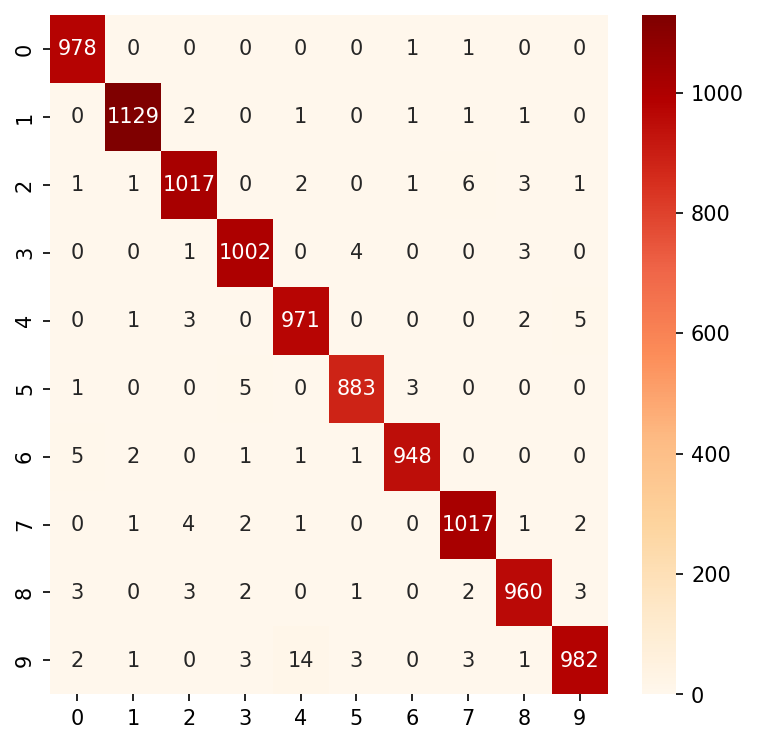

In [25]:
## graphical representation of Confusion matrix

plt.figure(figsize=(6, 6), dpi=150)
sns.heatmap(confusion, annot=True, cmap="OrRd", fmt='g')

In [26]:
## precision score

precision_cnn = precision_score(np.argmax(testY, axis=1), np.argmax(predicted_result_CNN, axis=1), average='weighted')
print('Precision: %f' % precision_cnn)

Precision: 0.988710


In [27]:
## recall score

recall_cnn = recall_score(np.argmax(testY, axis=1), np.argmax(predicted_result_CNN, axis=1), average='weighted')
print('recall: %f' % recall_cnn)

recall: 0.988700


In [28]:
## f1 score

f1_cnn = f1_score(np.argmax(testY, axis=1), np.argmax(predicted_result_CNN, axis=1), average= 'weighted')
print('F1 score: %f' % f1_cnn)

F1 score: 0.988693


In [29]:
# kappa


kappa_cnn = cohen_kappa_score(np.argmax(testY, axis=1), np.argmax(predicted_result_CNN, axis=1))
print('Cohens kappa: %f' % kappa_cnn)

Cohens kappa: 0.987440


In [30]:
# ROC AUC

auc_cnn = roc_auc_score(testY, predicted_result_CNN)
print('ROC AUC: %f' % auc_cnn)

ROC AUC: 0.999915


<h1><center> Performance Evaluation</center></h1>

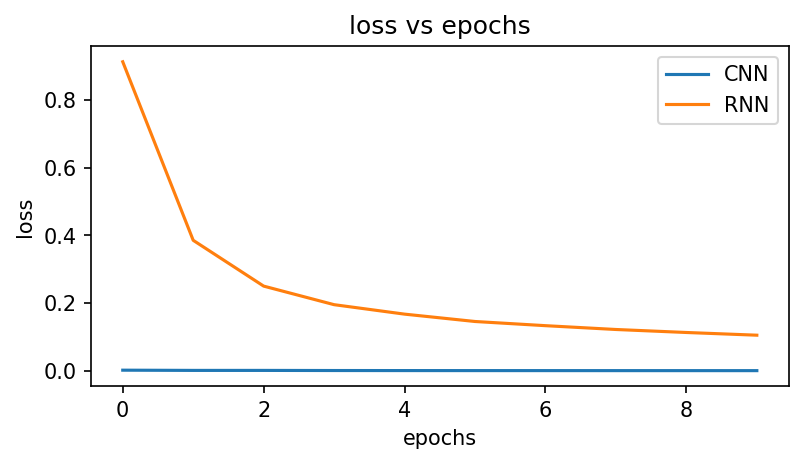

In [31]:
# graph of loss function 

plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history_CNN.history['loss'], label='CNN')
plt.plot(history_RNN.history['loss'], label='RNN')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss vs epochs")
plt.show()

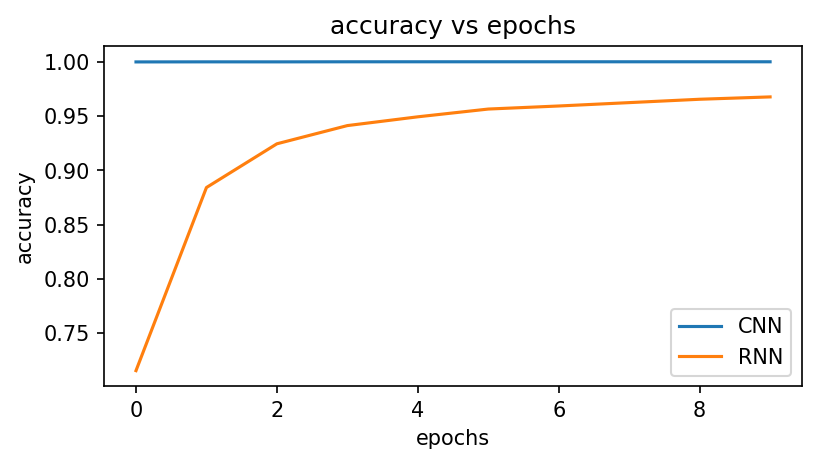

In [32]:
# graph of accuracy score

plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history_CNN.history['accuracy'], label='CNN')
plt.plot(history_RNN.history['accuracy'], label='RNN')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("accuracy vs epochs")
plt.show()

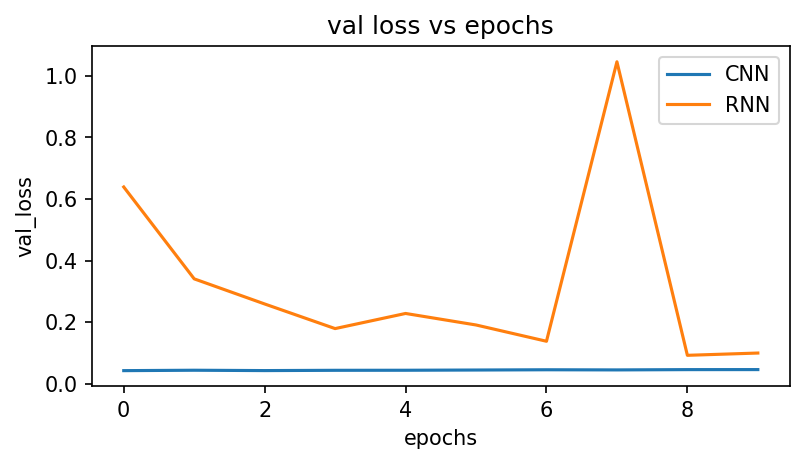

In [33]:
# graph of loss function 


plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history_CNN.history['val_loss'], label='CNN')
plt.plot(history_RNN.history['val_loss'], label='RNN')
plt.xlabel("epochs")
plt.ylabel("val_loss")
plt.legend()
plt.title("val loss vs epochs")
plt.show()

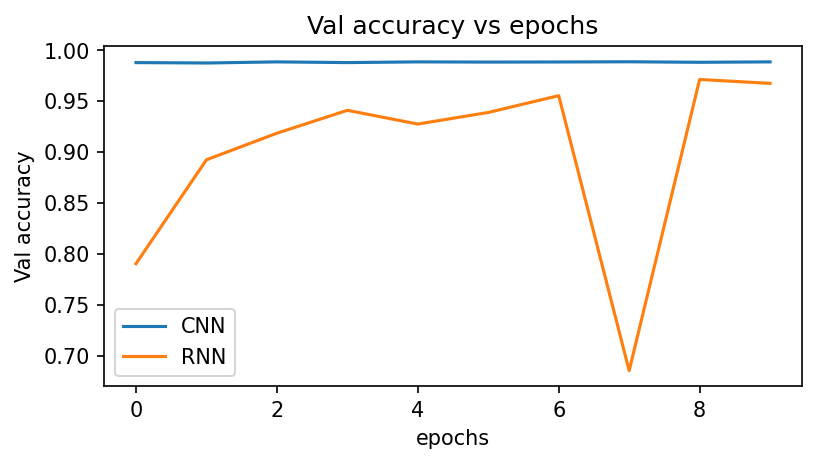

In [34]:
# graph of accuracy score

plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history_CNN.history['val_accuracy'],label='CNN')
plt.plot(history_RNN.history['val_accuracy'],label='RNN')
plt.xlabel("epochs")
plt.ylabel("Val accuracy")
plt.legend()
plt.title("Val accuracy vs epochs")
plt.show()

In [35]:
# creating lists
l1 =["accuracy", "Precision", "Recall", "F1 Score", "Cohens Kappa", "AUC"]
l2 =[acc_cnn, precision_cnn, recall_cnn, f1_cnn, kappa_cnn, auc_cnn]
l3 =[acc_rnn, precision_rnn, recall_rnn, f1_rnn, kappa_rnn, '-']


# creating the DataFrame
team = pd.DataFrame(list(zip(l1, l2, l3))) 

team.columns =['Metrics', 'RNN', 'CNN']
# displaying the DataFrame
print(team)

        Metrics       RNN       CNN
0      accuracy  0.988700    0.9676
1     Precision  0.988710  0.968401
2        Recall  0.988700    0.9676
3      F1 Score  0.988693  0.967651
4  Cohens Kappa  0.987440  0.963986
5           AUC  0.999915         -


In [36]:
from tabulate import tabulate
print(tabulate(team, headers = 'keys', tablefmt = 'psql'))

+----+--------------+----------+--------------------+
|    | Metrics      |      RNN | CNN                |
|----+--------------+----------+--------------------|
|  0 | accuracy     | 0.9887   | 0.9675999879837036 |
|  1 | Precision    | 0.98871  | 0.9684010691664745 |
|  2 | Recall       | 0.9887   | 0.9676             |
|  3 | F1 Score     | 0.988693 | 0.9676514221990042 |
|  4 | Cohens Kappa | 0.98744  | 0.9639859905503241 |
|  5 | AUC          | 0.999915 | -                  |
+----+--------------+----------+--------------------+
